In [95]:
#>>> Near Earth Object Machine Learning Models by Christopher Madden.

#_______________ ¶¶¶¶¶¶¶¶ 
#___________¶¶¶¶¶ _______¶¶¶¶¶ 
#_________¶¶¶ ________________¶¶¶ 
#_______¶¶¶ ____________________¶¶¶ 
#______¶¶ ________________________¶¶ 
#_____¶ ______¶¶¶_____¶¶¶__________¶¶ 
#____¶ _________¶¶______¶¶__________¶¶ 
#___¶¶ __________¶¶______¶¶_________¶¶ 
#___¶ ____________¶¶______¶¶___¶¶¶___¶¶ 
#__¶¶ _____¶¶_____¶¶______¶¶_____¶¶__¶¶ 
#__¶¶ ___¶¶¶______¶¶______¶¶______¶¶_¶¶ 
#__¶¶ __¶¶¶¶¶__________________¶¶_¶¶_¶¶ 
#___¶ __¶¶__¶¶_________________¶¶____¶¶ 
#___¶¶ ______¶¶______________¶¶¶____¶¶ 
#____¶¶ ______¶¶____________¶¶¶_____¶¶ 
#_____¶¶ _______¶¶¶¶_____¶¶¶¶______¶¶ 
#______¶¶ _________¶¶¶¶¶¶¶________¶¶ 
#________¶¶ ____________________¶¶ 
#__________¶¶¶ ______________¶¶¶ 
#____________ ¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶

# LIBRARIES AND RESOURCES

In [96]:
#>>> Import dependencies.
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from autoviz.AutoViz_Class import AutoViz_Class
from keras.preprocessing.image import ImageDataGenerator

#>>> Define source data.
file_path = './Resources/neo_v2.csv'

# PREPROCESS THE DATASET.

In [97]:
#>>> Import and read source data.
neo_df = pd.read_csv(file_path)

#>>> Display the first 10 rows.
neo_df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [98]:
#>>> Determine the number of unique values in each column.
neo_df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [99]:
#>>> Drop unnecessary columns: 'id', 'orbiting_body', and 'sentry_object'.
neo_df= neo_df.drop(['id', 'orbiting_body', 'sentry_object'],1)

#>>> Set index to 'name'.
neo_df = neo_df.set_index('name')

#>>> Display the first 10 rows.
neo_df.head(10)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
name,,,,,,
162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,24.32,False
(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,20.95,False
(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,28.49,False
88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,19.40,False


In [100]:
#>>> Define the features set.
X = neo_df.copy()
X = X.drop('hazardous', axis=1)

#>>> Display the first 10 rows.
X.head(10)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
name,,,,,
162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73
277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00
512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83
(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20
(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09
(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,24.32
(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,20.95
(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,28.49
88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,19.40


In [101]:
#>>> Define the target set.
y = neo_df['hazardous'].values

#>>> Display the first ten values.
y[:10]

array([False,  True, False, False,  True, False, False, False, False,
       False])

In [102]:
#>>> Split the preprocessed data into a training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, train_size=0.80)

#>>> Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72668, 5)
(18168, 5)
(72668,)
(18168,)


In [103]:
#>>> Create a StandardScaler instance.
scaler = StandardScaler()

#>>> Fit the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

#>>> Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# AUTOVIZUALIZE DATA

Shape of your Data Set loaded: (90836, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns max in each category:
    Numeric Columns : ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
    Integer-Categorical Columns: ['id']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: ['hazardous']
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: ['name']
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: ['orbiting_body', 'sentry_object']
    10 Predictors classified...
        2 variables removed since they were ID or low-information variab

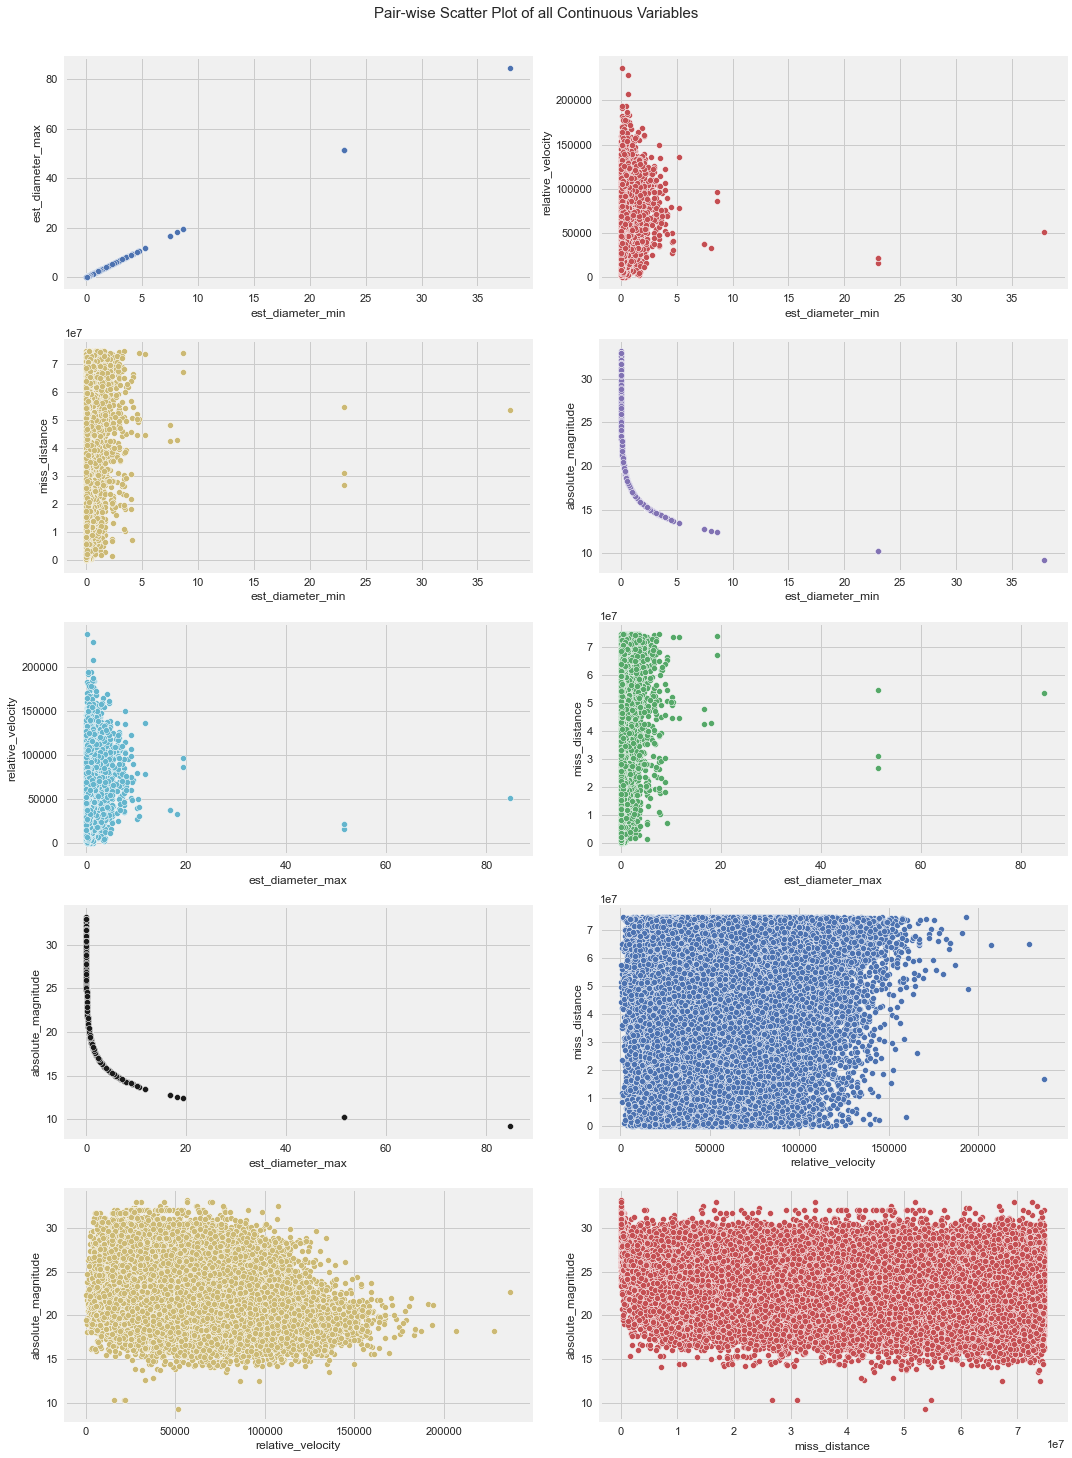

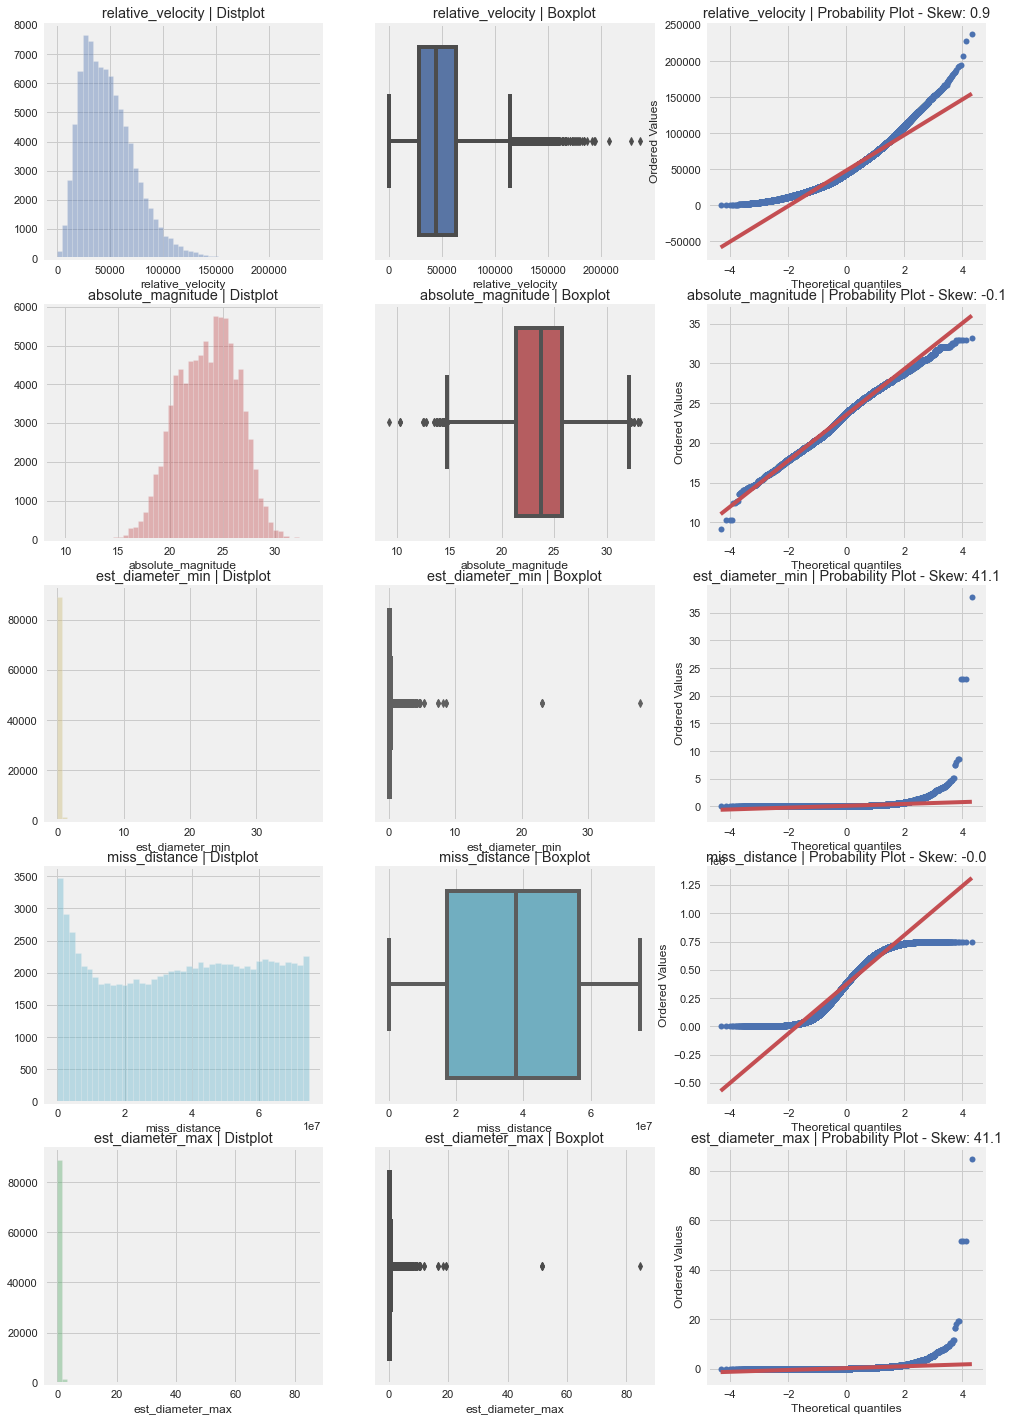

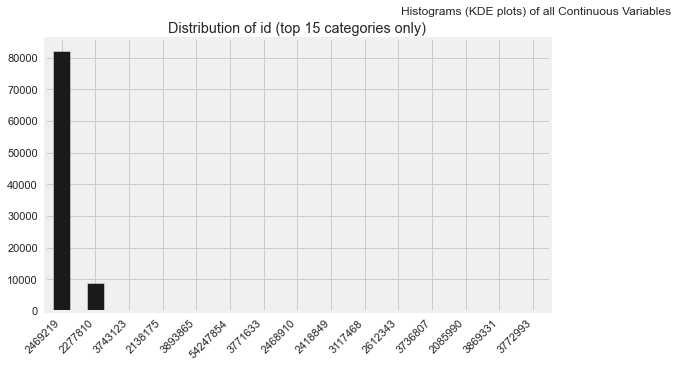

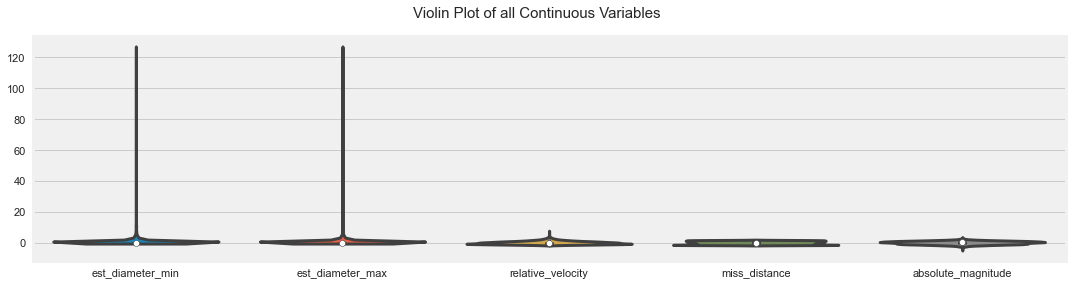

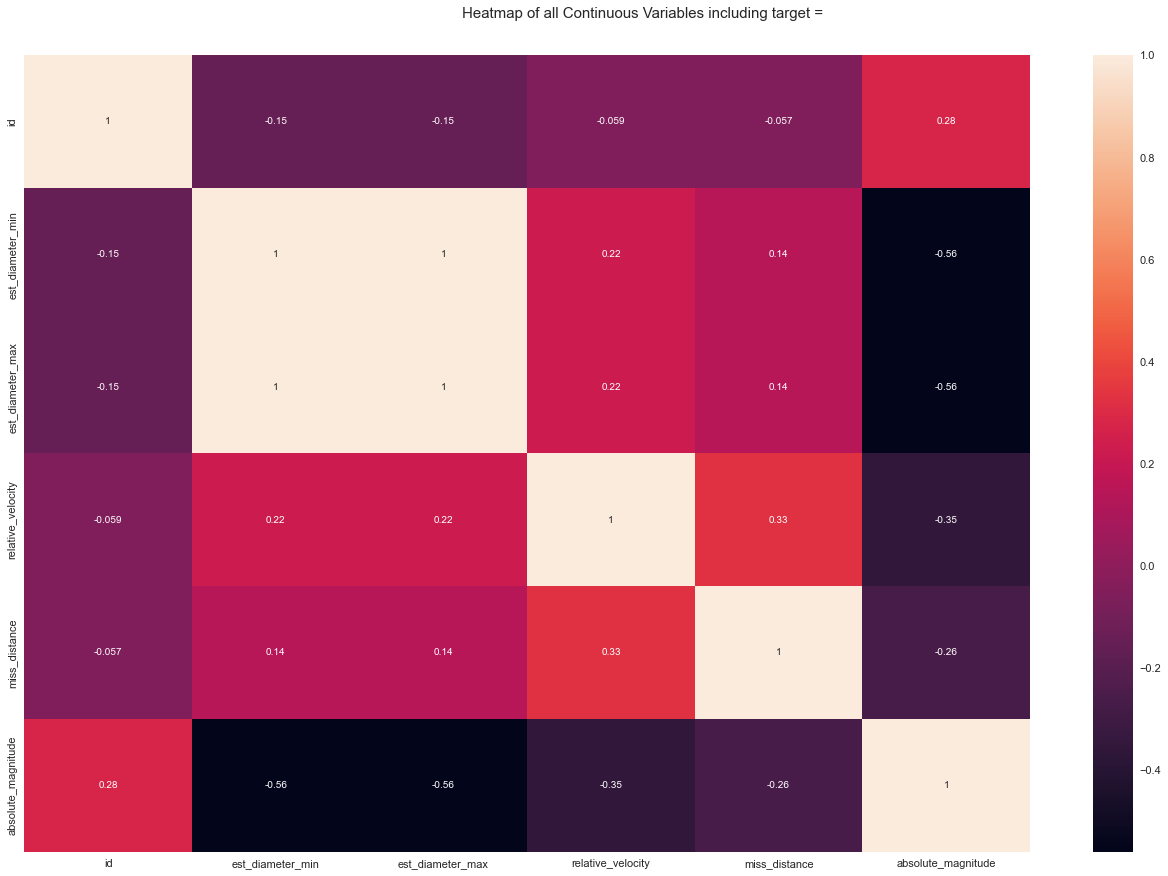

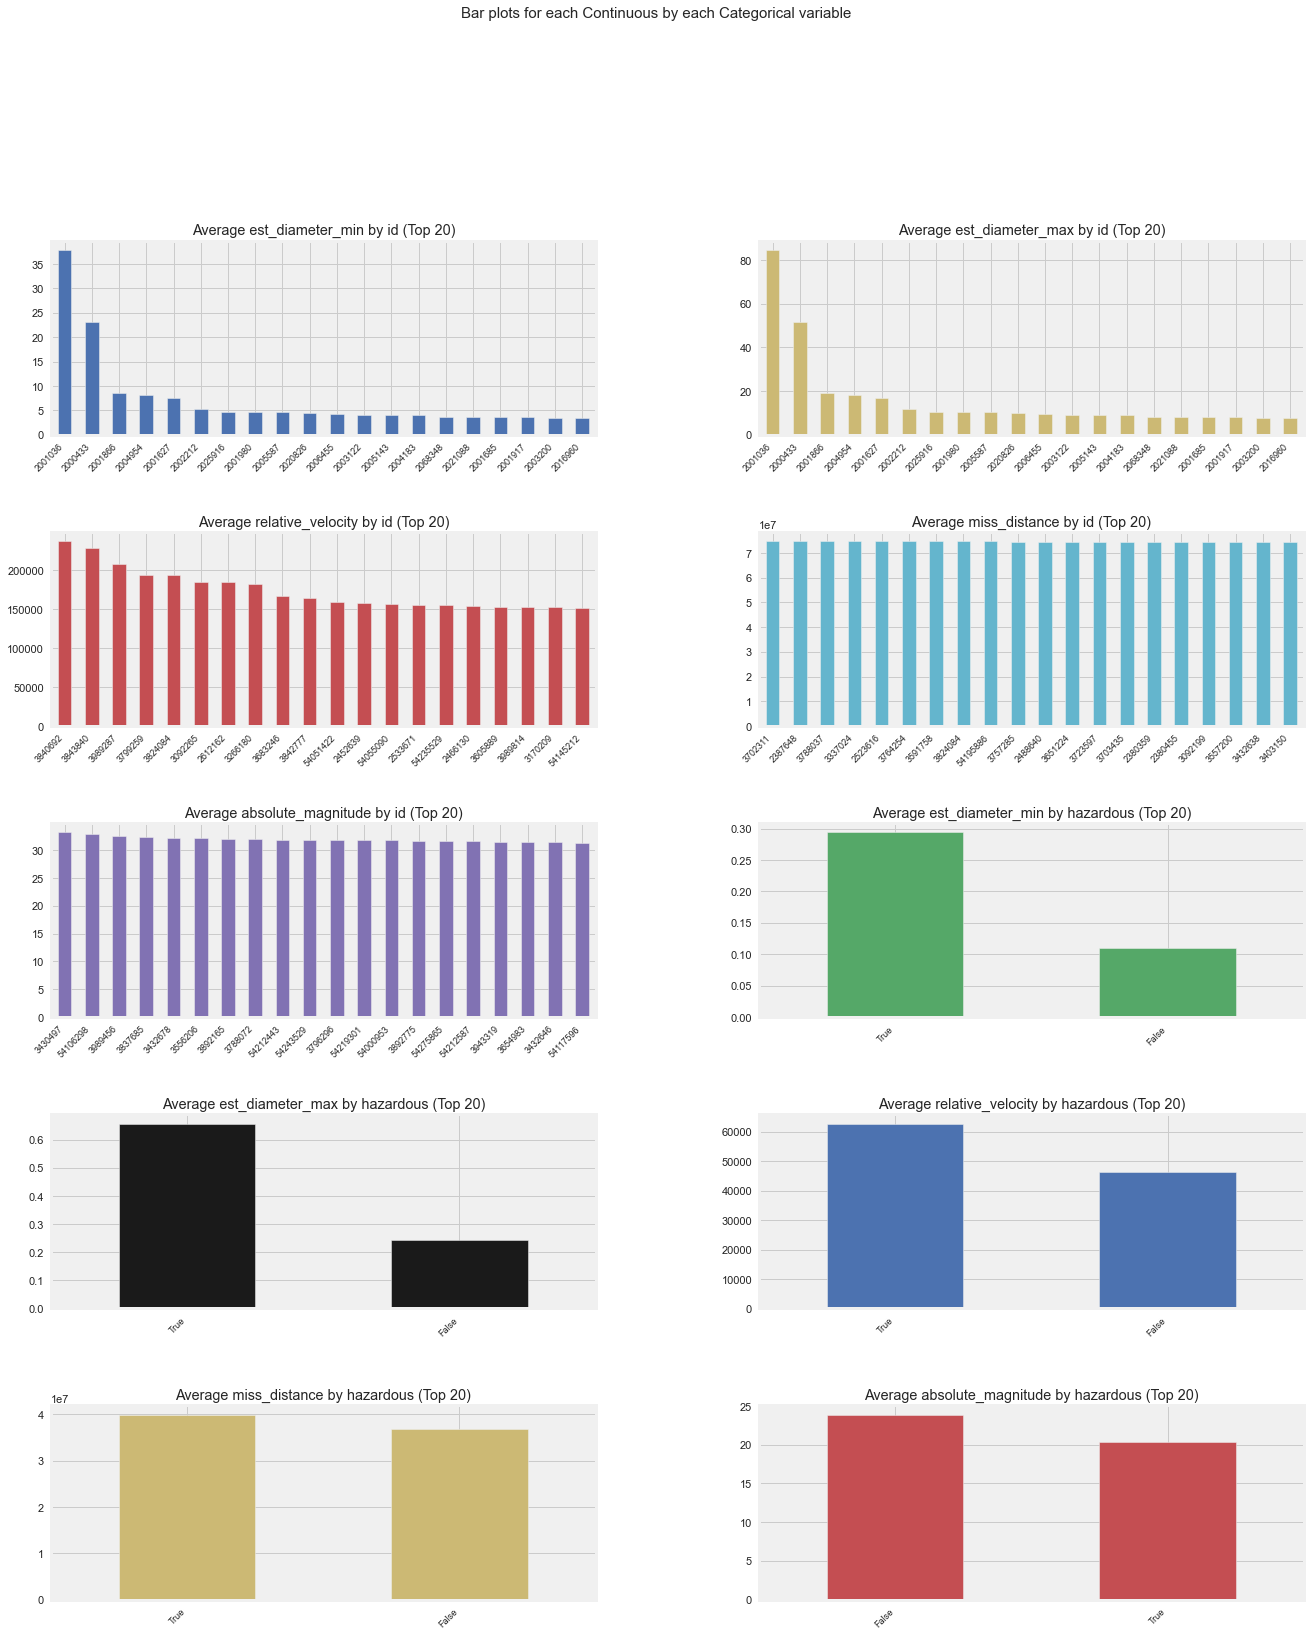

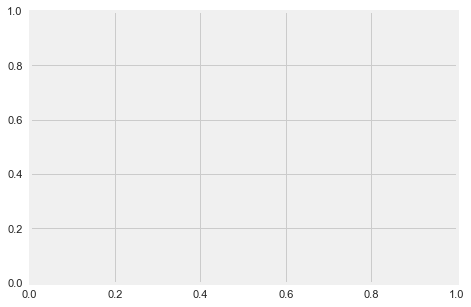

In [104]:
#>>> Initialize the Autoviz class in an object.
AV = AutoViz_Class()

#>>> Must specify in order for AutoViz to display plots.
%matplotlib inline

#>>> Passing the source data and parameters.
graph = AV.AutoViz(
    file_path,
    save_plot_dir='./Images',
    sep=',',
    depVar='',
    dfte=None,
    header=0,
    verbose=2,
    lowess=False,
    chart_format='jpg',
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

# DECISION TREE CLASSIFICATION

In [105]:
#>>> Create the decision tree classifier instance.
model = tree.DecisionTreeClassifier()

#>>> Fit the model.
model = model.fit(X_train_scaled, y_train)

#>>> Make predictions using the testing data.
predictions = model.predict(X_test_scaled)

#>>> Calculate the confusion matrix.
cm = confusion_matrix(y_test, predictions)

#>>> Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Export our model to HDF5 file.
model.save("AlphabetSoupCharity.h5")

#>>> Display the Dataframe.
cm_df

,Predicted 0,Predicted 1
Actual 0,15420,1007
Actual 1,891,850


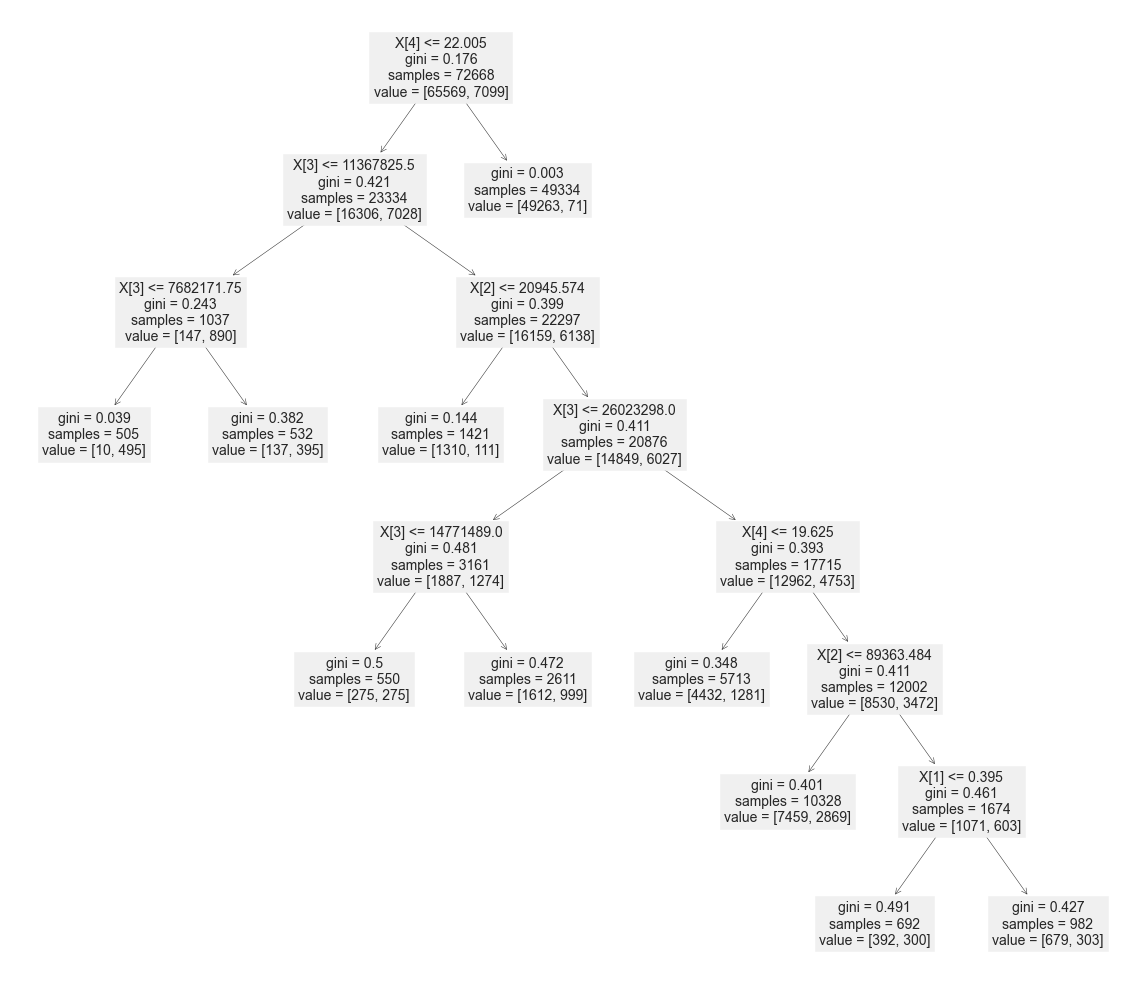

In [106]:
#>>> Display decision tree and save the output.
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
clf.fit(X_train, y_train)
plt.figure(figsize=(18,18))
tree.plot_tree(clf, fontsize=14)
plt.savefig('./Images/decision_tree.jpg')

In [107]:
#>>> Calculate the accuracy score.
acc_score = accuracy_score(y_test, predictions)

#>>> Display results.
print('Confusion Matrix')
display(cm_df)
print(f'Accuracy Score : {acc_score}')
print('Classification Report')
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,15420,1007
Actual 1,891,850


Accuracy Score : 0.8955306032584764
Classification Report
              precision    recall  f1-score   support

       False       0.95      0.94      0.94     16427
        True       0.46      0.49      0.47      1741

    accuracy                           0.90     18168
   macro avg       0.70      0.71      0.71     18168
weighted avg       0.90      0.90      0.90     18168



In [ ]:
#>>> TO DO: ADD ADDITIONAL TESTS

# NEURAL NETWORK: COMPILE, TRAIN AND EVALUATE

In [108]:
#>>> Define the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

#>>> Number of input features.
nn = tf.keras.models.Sequential()

#>>> First hidden layer.
nn.add(tf.keras.layers.Dense(units=110, activation="relu", input_dim = number_input_features))

#>>> Second hidden layer.
nn.add(tf.keras.layers.Dense(units=80, activation="relu"))

#>>> Third hidden layer.
nn.add(tf.keras.layers.Dense(units=40, activation="sigmoid"))

#>>> Fourth hidden layer.
nn.add(tf.keras.layers.Dense(units=20, activation="sigmoid"))

#>>> Output layer.
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

#>>> Check the structure of the model.
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 110)               660       
                                                                 
 dense_16 (Dense)            (None, 80)                8880      
                                                                 
 dense_17 (Dense)            (None, 40)                3240      
                                                                 
 dense_18 (Dense)            (None, 20)                820       
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 13,621
Trainable params: 13,621
Non-trainable params: 0
_________________________________________________________________


In [109]:
#>>> Compile the model.
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#>>> Train the model.
fit_model = nn.fit(X_train_scaled, y_train, epochs=5)

#>>> Evaluate the model using the test data.
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Export our model to HDF5 file.
nn.save("AlphabetSoupCharity.h5")

#>>> Display model evaluation.
print(f'\nLoss: {model_loss}\nAccuracy: {model_accuracy}')

Epoch 1/5
2271/2271 [==============================] - 6s 2ms/step - loss: 13.7598 - accuracy: 0.0977
Epoch 2/5
2271/2271 [==============================] - 6s 2ms/step - loss: 13.7598 - accuracy: 0.0977
Epoch 3/5
2271/2271 [==============================] - 6s 3ms/step - loss: 13.7598 - accuracy: 0.0977
Epoch 4/5
2271/2271 [==============================] - 6s 3ms/step - loss: 13.7598 - accuracy: 0.0977
Epoch 5/5
2271/2271 [==============================] - 6s 3ms/step - loss: 13.7598 - accuracy: 0.0977
568/568 - 1s - loss: 13.7880 - accuracy: 0.0958 - 847ms/epoch - 1ms/step

Loss: 13.787972450256348
Accuracy: 0.09582783281803131


In [ ]:
#>>> TO DO: OUTPUT CONFUSION MATRIX VIA KERAS